## Exploring Social Mission Rank

To reproduce this analysis you'll need to [prepare your environment](https://github.com/fdudatamining/system). Alternatively you can [install the framework](https://github.com/fdudatamining/framework) and [obtain the data](https://github.com/fdudatamining/data) separately.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from framework.draw import *
from framework.data import *
from scipy.stats import spearmanr

In [2]:
df = pd.read_sql('''
select
    `Provider Number`,
    `Rank`,
    `Total Performance Score`
from
    `medical_schools_social_mission_rank` as ms,
    `hospital_practitioners` as hp
where
    hp.`Medical school name` = ms.`SCHOOL`;
''', sql('datamining'))

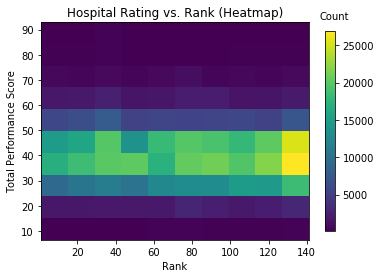

Rank,"(0.86, 15]","(15, 29]","(29, 43]","(43, 57]","(57, 71]","(71, 85]","(85, 99]","(99, 113]","(113, 127]","(127, 141]"
Total Performance Score,,,,,,,,,,
"(6.514, 15.226]",148,128,140,133,350,327,281,220,244,405
"(15.226, 23.851]",1843,1844,1933,1924,1976,2893,2362,1981,2262,3004
"(23.851, 32.477]",9222,10542,11410,10278,12580,13149,13128,14826,14461,18437
"(32.477, 41.103]",16959,18559,20014,20210,17270,20463,21074,19587,21958,26906
"(41.103, 49.729]",14806,15946,19848,13921,18260,19833,19180,17975,20260,25346
"(49.729, 58.354]",5929,6494,7855,5297,5715,5475,5688,5898,5391,7318
"(58.354, 66.98]",1843,1992,2473,1625,1703,2100,2174,1553,1590,2072
"(66.98, 75.606]",711,562,818,539,763,1079,610,661,511,750
"(75.606, 84.231]",281,238,358,205,167,206,201,252,273,278


In [7]:
# Hospital Rating x Rank (Heatmap)
aggregate_bins(df=df.dropna(),
               x='Rank', xlabel='Rank',
               y='Total Performance Score', ylabel='Total Performance Score',
               n=10,
               title='Hospital Rating vs. Rank (Heatmap)',
               save='social_hospital_rating_vs_rank_heatmap.png', dpi=300,
               show=True)

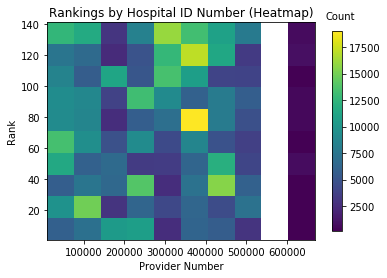

Provider Number,"(9340.916, 76009.4]","(76009.4, 142017.8]","(142017.8, 208026.2]","(208026.2, 274034.6]","(274034.6, 340043]","(340043, 406051.4]","(406051.4, 472059.8]","(472059.8, 538068.2]","(538068.2, 604076.6]","(604076.6, 670085]"
Rank,,,,,,,,,,
"(0.86, 15]",5916.0,7136.0,10451.0,10726.0,2605.0,6211.0,5736.0,2947.0,NaN,154.0
"(15, 29]",9732.0,14888.0,3012.0,6274.0,4235.0,6368.0,4511.0,7244.0,NaN,149.0
"(29, 43]",5747.0,7445.0,6514.0,13954.0,2579.0,7245.0,15601.0,5969.0,NaN,203.0
"(43, 57]",11538.0,6036.0,6672.0,3393.0,3476.0,6306.0,12026.0,4089.0,NaN,777.0
"(57, 71]",13473.0,9495.0,4801.0,9212.0,4407.0,8762.0,4911.0,3696.0,NaN,152.0
"(71, 85]",9209.0,8759.0,2585.0,5774.0,7066.0,19000.0,7974.0,4737.0,NaN,578.0
"(85, 99]",9296.0,8873.0,3856.0,13248.0,9154.0,6019.0,7997.0,5804.0,NaN,567.0
"(99, 113]",8567.0,5727.0,11249.0,5211.0,13524.0,10704.0,4013.0,3926.0,NaN,148.0
"(113, 127]",7449.0,6637.0,2435.0,4986.0,12689.0,17152.0,11413.0,3377.0,NaN,928.0


In [8]:
# Rankings by Hospital ID Number (Heatmap)
aggregate_bins(df=df.dropna(),
               x='Provider Number', xlabel='Provider Number',
               y='Rank', ylabel='Rank',
               n=[10, 10],
               title='Rankings by Hospital ID Number (Heatmap)',
               save='social_ranking_by_hospital_id_heatmap.png', dpi=300,
               show=True)

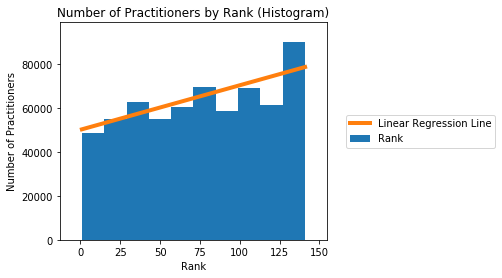

 
203.1 x + 5.021e+04
SpearmanrResult(correlation=0.70909090909090899, pvalue=0.021665923367532435)


In [9]:
# Number of Practitioners by Rank (Histogram)
bins=10
y,x=np.histogram(df['Rank'], bins)
# x=x[:-1]
z = np.polyfit(x[:-1], y, 1)
p = np.poly1d(z)
draw(kind='hist', ylabel='Number of Practitioners',
     x=df['Rank'], xlabel='Rank',
     bins=bins,
     title='Number of Practitioners by Rank (Histogram)')
draw(kind='plot',
     x=x, y=p(x), label='Linear Regression Line',
     legend='right', linewidth=4,
     save='social_practitioners_by_rank_histogram_with_regression_bins_10.png', dpi=300,
     show=True)
print(p, spearmanr(x[:-1], y), sep='\n')

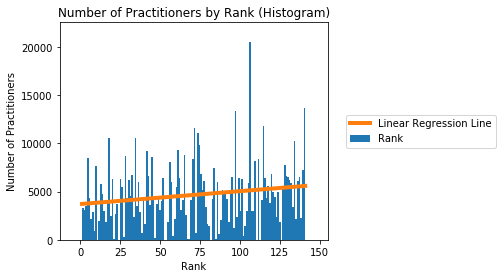

 
13.34 x + 3708
SpearmanrResult(correlation=0.14716746643230211, pvalue=0.087315129591598178)


In [10]:
# Number of Practitioners by Rank (Histogram)
bins=len(df['Rank'].unique())
y,x=np.histogram(df['Rank'], bins)
# x=x[:-1]
z = np.polyfit(x[:-1], y, 1)
p = np.poly1d(z)
draw(kind='hist', ylabel='Number of Practitioners',
     x=df['Rank'], xlabel='Rank',
     bins=bins,
     title='Number of Practitioners by Rank (Histogram)')
draw(kind='plot',
     x=x, y=p(x), label='Linear Regression Line',
     legend='right', linewidth=4,
     save='social_practitioners_by_rank_histogram_with_regression.png', dpi=300,
     show=True)
print(p, spearmanr(x[:-1], y), sep='\n')

 
-0.0123 x + 40.95
SpearmanrResult(correlation=-0.044151305998712545, pvalue=3.3631695146275021e-270)


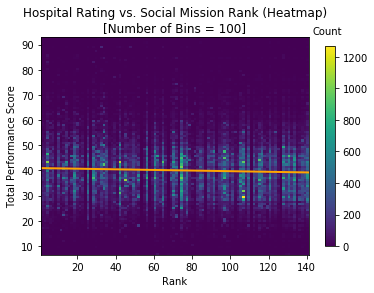

Rank,"(0.86, 2.4]","(2.4, 3.8]","(3.8, 5.2]","(5.2, 6.6]","(6.6, 8]","(8, 9.4]","(9.4, 10.8]","(10.8, 12.2]","(12.2, 13.6]","(13.6, 15]",...,"(127, 128.4]","(128.4, 129.8]","(129.8, 131.2]","(131.2, 132.6]","(132.6, 134]","(134, 135.4]","(135.4, 136.8]","(136.8, 138.2]","(138.2, 139.6]","(139.6, 141]"
Total Performance Score,,,,,,,,,,,,,,,,,,,,,
"(6.514, 7.463]",0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,5.0,19.0,29.0,9.0,8.0,0.0,2.0,6.0,3.0,11.0
"(7.463, 8.325]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(8.325, 9.188]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(9.188, 10.0503]",1.0,0.0,0.0,2.0,0.0,0.0,5.0,0.0,1.0,0.0,...,5.0,1.0,9.0,2.0,1.0,3.0,1.0,12.0,4.0,3.0
"(10.0503, 10.913]",5.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,4.0,1.0,6.0,1.0,2.0,3.0,2.0,8.0,5.0,4.0
"(10.913, 11.775]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0
"(11.775, 12.638]",5.0,3.0,1.0,1.0,0.0,0.0,3.0,1.0,32.0,2.0,...,13.0,4.0,11.0,7.0,9.0,1.0,2.0,9.0,8.0,5.0
"(12.638, 13.501]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(13.501, 14.363]",5.0,9.0,5.0,17.0,1.0,2.0,5.0,1.0,3.0,1.0,...,15.0,6.0,7.0,8.0,29.0,1.0,25.0,7.0,3.0,8.0


In [14]:
# Hospital Rating x Rank (Heatmap)
x,y=df['Rank'], df['Total Performance Score']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
print(p, spearmanr(x, y), sep='\n')
x=[x.as_matrix().min(), x.as_matrix().max()]
aggregate_bins(
   ax=draw(title='Hospital Rating vs. Social Mission Rank (Heatmap)\n[Number of Bins = 100]',
           xlabel='Rank', ylabel='Total Performance Score',
           x=x, y=p(x), kind='plot', linewidth=2, c='orange'),
   df=df.dropna(),
   x='Rank', y='Total Performance Score', n=100,
   fillna=0,
   save='social_hospital_rating_vs_rank_heatmap_bins_100_regression.png', dpi=300,
   show=True)

In [19]:
x,y=df['Rank'], df['Total Performance Score']
len(x)

632113

In [20]:
len(y)

632113

In [22]:
# 6/9/17: Also find the goodness of fit, R-squared
# See an earlier cell with the following comment in 2017-06-01-colleges_ravi: 
#   # Added 6/9/17, Ravi, to find Rsquared R2 for the goodness of fit.

from sklearn import *
from scipy.stats import *

lr = linear_model.LinearRegression()


lr.fit(x.reshape(-1,1), y.reshape(-1,1))


r2 = lr.score(x.reshape(-1,1), y.reshape(-1,1))
r2


/home/ravirao/.pyenv/versions/3.5.1/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

/home/ravirao/.pyenv/versions/3.5.1/lib/python3.5/site-packages/ipykernel_launcher.py:14: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



0.0022773046432427169